In [3]:
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

import math
import cv2
import numpy as np

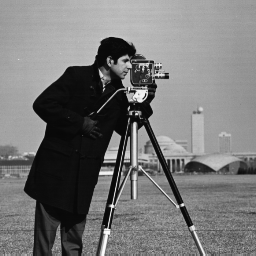

In [13]:
img = cv2.imread('Cameraman.bmp',0)
cv2_imshow(img)
img = cv2.resize(img, ( 50,50 ))
width, height = np.shape(img)

In [14]:
print(width)
print(height)

50
50


In [7]:
def F_Fourier(a,b,c,d,width,height):
  form = np.exp(-2j * np.pi * ((a * c)/width  + (b * d)/height))
  return form

fourier = np.zeros((width,height),np.complex_)
for c in range(width):
  for d in range(height):
    sum = 0
    for a in range(width):
      for b in range(height):
        sum += img[a,b] * F_Fourier(a,b,c,d,width,height)
    fourier[c,d] = 1/width*height * sum

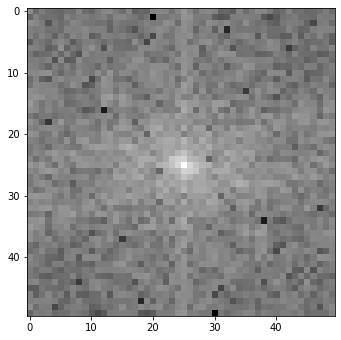

In [15]:
F_FourierT=np.fft.fftshift(fourier)
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(np.log(abs(F_FourierT)),cmap="gray")
plt.show()

In [10]:
filter1 = np.ones((2,2),np.int8)
filter1[0,0] = -1
filter1[1,0] = -1
filter2 = np.ones((2,2),np.int8)
filter2[1,0] = -1
filter2[1,1] = -1


dfX = 1/2 * (cv2.filter2D(img,ddepth = -1,kernel = filter1))
dfY = 1/2 * (cv2.filter2D(img,ddepth = -1,kernel = filter2))

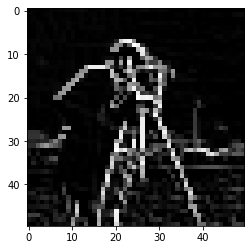

In [11]:
magnitude = np.zeros((width,height))
for i in range(width):
  for j in range(height):
    magnitude[i,j] = math.sqrt((dfX[i,j])**2 + (dfY[i,j])**2)
plt.imshow(magnitude,cmap="gray")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


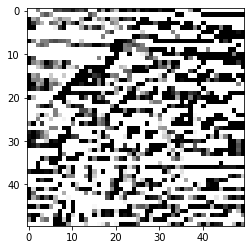

In [12]:
orientation = np.zeros((width,height))
for i in range(width):
  for j in range(height):
   orientation[i,j] = math.atan(dfX[i,j]/dfY[i,j])
plt.imshow(orientation,cmap="gray")